In [1]:
import pandas as pd
!pip install scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
file = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
type(file)
file.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
import numpy as np

In [5]:
len(file)

5110

In [6]:
data = pd.DataFrame(file)
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
print('mean age: ' + str(file['age'].mean()))

mean age: 43.226614481409


In [8]:
print('median age: ' + str(file['age'].median()))

median age: 45.0


In [9]:
print('mean avg_glucose_level: ' + str(file['avg_glucose_level'].mean()))
print('median avg_glucose_level: ' + str(file['avg_glucose_level'].median()))

mean avg_glucose_level: 106.1476771037182
median avg_glucose_level: 91.88499999999999


In [10]:
print('mean bmi: ' + str(file['bmi'].mean()))
print('median bmi: ' + str(file['bmi'].median()))

mean bmi: 28.893236911794666
median bmi: 28.1


In [11]:
print('std age: ' + str(file['age'].std()))
print('std avg_glucose_level: ' + str(file['avg_glucose_level'].std()))
print('std bmi: ' + str(file['bmi'].std()))

std age: 22.61264672311349
std avg_glucose_level: 45.28356015058198
std bmi: 7.854066729680164


In [12]:

print('Statistics for each column')
file[file.select_dtypes(include=[np.number]).columns].describe()

Statistics for each column


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


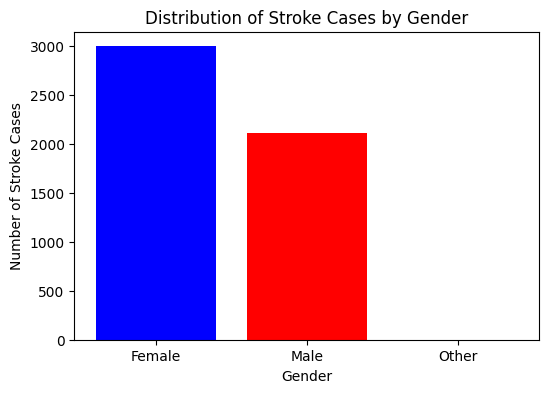

In [14]:
genderCounts = file['gender'].value_counts()

# Distribution of strokes cases based on gender ,1st Chart
plt.figure(figsize=(6, 4))
plt.bar(genderCounts.index, genderCounts.values, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')
plt.title('Distribution of Stroke Cases by Gender')
plt.show()

In [15]:
 #This bar chart shows the distribution of stroke cases based on gender. By this we can conclude which gender have more stroke cases


In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


hypertension
0    4612
1     498
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Stroke Cases by hypertension'}, xlabel='hypertension', ylabel='count'>

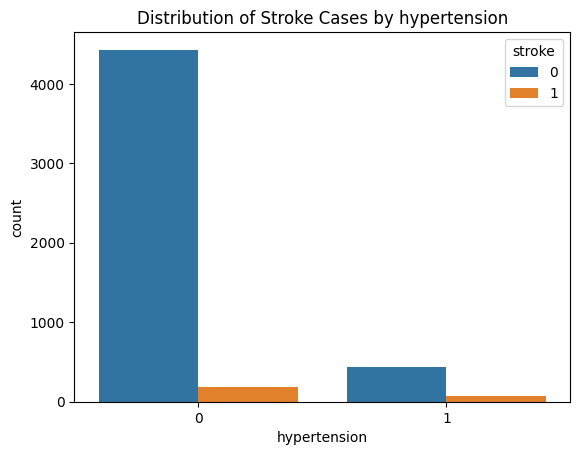

In [17]:
import seaborn
print(file['hypertension'].value_counts())
plt.title('Distribution of Stroke Cases by hypertension')
seaborn.countplot(data=file, x='hypertension', hue='stroke')

In [18]:
#It can be clearly state that people who are not having hypertension they also can have stroke attack

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


<Axes: xlabel='work_type', ylabel='count'>

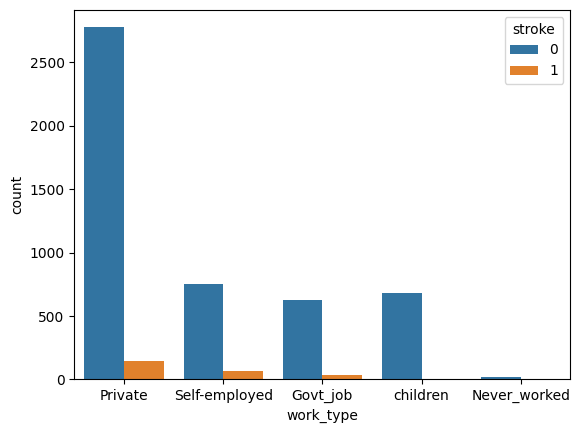

In [19]:
print(file['work_type'].value_counts())
seaborn.countplot(data=file, x='work_type', hue='stroke')

In [20]:
#People in private suffer more stroke than childrean and never worked

In [21]:
isBmi = file['bmi'].isnull()
percentageNullBmi = (isBmi.sum() / len(file)) * 100
print("Is 'BMI' column having null values? ", isBmi.any())
print("Percentage of null values in 'BMI' column: {:.2f}%".format(percentageNullBmi))
meanBmi = file['bmi'].mean()
file['bmi'].fillna(meanBmi, inplace=True)

Is 'BMI' column having null values?  True
Percentage of null values in 'BMI' column: 3.93%


In [22]:
#After filling the null values
isBmi = file['bmi'].isnull()
percentageNullBmi = (isBmi.sum() / len(file)) * 100
print("Is 'BMI' column having null values? ", isBmi.any())

Is 'BMI' column having null values?  False


In [23]:
from sklearn.ensemble import IsolationForest
numericalColumns = ['age', 'bmi']
dataForOutlier = file[numericalColumns]
outlierModel = IsolationForest(contamination=0.05, random_state=42)
outlierModel.fit(dataForOutlier)
outlierPredictions = outlierModel.predict(dataForOutlier)
outlierMask = outlierPredictions == 1
fileCleaned = file[outlierMask]
print(fileCleaned)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5105  18234  Female  80.0             1              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [24]:
numericalColumns = file.select_dtypes(include=[np.number]).columns

for column in numericalColumns: # Applied Min-Max Scaling
    minValue = file[column].min()
    maxValue = file[column].max()
    file[column] = (file[column] - minValue) / (maxValue - minValue)

print(file)

            id  gender       age  hypertension  heart_disease ever_married  \
0     0.123214    Male  0.816895           0.0            1.0          Yes   
1     0.708205  Female  0.743652           0.0            0.0          Yes   
2     0.426015    Male  0.975586           0.0            1.0          Yes   
3     0.824928  Female  0.597168           0.0            0.0          Yes   
4     0.021929  Female  0.963379           1.0            0.0          Yes   
...        ...     ...       ...           ...            ...          ...   
5105  0.249297  Female  0.975586           1.0            0.0          Yes   
5106  0.614850  Female  0.987793           0.0            0.0          Yes   
5107  0.269730  Female  0.426270           0.0            0.0          Yes   
5108  0.514278    Male  0.621582           0.0            0.0          Yes   
5109  0.612188  Female  0.536133           0.0            0.0          Yes   

          work_type Residence_type  avg_glucose_level       bmi

In [25]:
fileEncoded = pd.get_dummies(file, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
print(fileEncoded)

            id       age  hypertension  heart_disease  avg_glucose_level  \
0     0.123214  0.816895           0.0            1.0           0.801265   
1     0.708205  0.743652           0.0            0.0           0.679023   
2     0.426015  0.975586           0.0            1.0           0.234512   
3     0.824928  0.597168           0.0            0.0           0.536008   
4     0.021929  0.963379           1.0            0.0           0.549349   
...        ...       ...           ...            ...                ...   
5105  0.249297  0.975586           1.0            0.0           0.132167   
5106  0.614850  0.987793           0.0            0.0           0.323516   
5107  0.269730  0.426270           0.0            0.0           0.128658   
5108  0.514278  0.621582           0.0            0.0           0.513203   
5109  0.612188  0.536133           0.0            0.0           0.139230   

           bmi  stroke  gender_Male  gender_Other  ever_married_Yes  \
0     0.301260  

In [26]:
#New feature: bmi_category
def bmiToBmiCategory(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 34.9:
        return 'Obese-1'
    elif 35 <= bmi <= 39.9:
        return 'Obese-2'
    elif bmi >= 40:
        return 'Obese-3'
    
fileEncoded['bmiCategory'] = fileEncoded.apply(lambda row: bmiToBmiCategory(row['bmi']), axis=1)

In [27]:
#New feature:Age Group
ageDiv = [0, 18, 45, 60, float('inf')]
ageLabels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
fileEncoded['ageGroup'] = pd.cut(fileEncoded['age'], bins=ageDiv, labels=ageLabels, right=False)

# New feature: Glucose Level Category
glucoseDiv = [0, 100, 140, float('inf')]
glucoseLabels = ['Low', 'Normal', 'High']
fileEncoded['glucose_level_category'] = pd.cut(fileEncoded['avg_glucose_level'], bins=glucoseDiv, labels=glucoseLabels, right=False)

print(fileEncoded.head())

         id       age  hypertension  heart_disease  avg_glucose_level  \
0  0.123214  0.816895           0.0            1.0           0.801265   
1  0.708205  0.743652           0.0            0.0           0.679023   
2  0.426015  0.975586           0.0            1.0           0.234512   
3  0.824928  0.597168           0.0            0.0           0.536008   
4  0.021929  0.963379           1.0            0.0           0.549349   

        bmi  stroke  gender_Male  gender_Other  ever_married_Yes  ...  \
0  0.301260     1.0         True         False              True  ...   
1  0.212981     1.0        False         False              True  ...   
2  0.254296     1.0         True         False              True  ...   
3  0.276060     1.0        False         False              True  ...   
4  0.156930     1.0        False         False              True  ...   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False        

In [28]:
fileEncoded.to_csv("Resultant_CSV.csv", index=False)